## Statistiche GAM da csv

Le statistiche partono dal file csv creato nel notebook GAM_stat02 e riporta le webapp accedute nel corso delle diverse sessioni GAM. Dal momento che per una stessa sessione possono essere accedute diverse webapp, il numero di webapp è maggione del numero di sessioni

In [1]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.0, style="whitegrid")

Per poter gestire il DataFrame come Time-series è necessario importarlo dichiarando che colonna di tipo data utilizzare come indice. Eventualmente sarebbe possibile passare anche una stringa di formato per il parse della data in imput.<br>In questo caso non è necessaria in quanto la colonna è già nel formato di default

In [2]:
file_path = os.path.join("export_stat_gam.csv")
df_webapp = pd.read_csv(file_path,
                        # Make sure the dates import in datetime format
                        parse_dates=['DATA'],
                        # Set DATE as the index so you can subset data by time period
                        index_col=['DATA'])
# Mask no data values so they are not plotted / used in analysis
#na_values=['999.99']
df_webapp.head()

,GAM_ID,DOMAIN,USERID,BEGIN_USER,WEBAPP
DATA,,,,,
2020-07-01 03:33:49,553799,EXT,W141088,W1,/cgapps3/wfciclopassivo
2020-07-01 06:08:46,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 09:16:34,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 10:13:46,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 10:46:31,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa


In [3]:
df_webapp.index

DatetimeIndex(['2020-07-01 03:33:49', '2020-07-01 06:08:46',
               '2020-07-01 09:16:34', '2020-07-01 10:13:46',
               '2020-07-01 10:46:31', '2020-07-01 11:49:45',
               '2020-07-01 05:20:28', '2020-07-01 05:26:58',
               '2020-07-01 05:38:21', '2020-07-01 05:42:55',
               ...
               '2021-02-07 20:19:26', '2021-02-07 20:24:41',
               '2021-02-07 20:30:00', '2021-02-07 20:35:17',
               '2021-02-07 20:40:34', '2021-02-07 20:45:51',
               '2021-02-07 20:51:10', '2021-02-07 20:56:27',
               '2021-02-07 21:19:04', '2021-02-07 23:30:56'],
              dtype='datetime64[ns]', name='DATA', length=584734, freq=None)

In [4]:
webapp_dett = df_webapp['WEBAPP']
webapp_dett

DATA
2020-07-01 03:33:49      /cgapps3/wfciclopassivo
2020-07-01 06:08:46         /cgapps3/ContiAttesa
2020-07-01 09:16:34         /cgapps3/ContiAttesa
2020-07-01 10:13:46         /cgapps3/ContiAttesa
2020-07-01 10:46:31         /cgapps3/ContiAttesa
                                 ...            
2021-02-07 20:45:51         /cgapps3/moduliAdobe
2021-02-07 20:51:10         /cgapps3/moduliAdobe
2021-02-07 20:56:27         /cgapps3/moduliAdobe
2021-02-07 21:19:04    /cgapps3/transfer-account
2021-02-07 23:30:56           /cgvad/welcome-kit
Name: WEBAPP, Length: 584734, dtype: object

Estraggo il linechart e il Bar Chart relativo al numero di webapp accedute per ogni ora.

In [5]:
webapp_series_by_h = webapp_dett.index.hour.value_counts().sort_index()
webapp_series_by_h

0        29
1        36
2        50
3       156
4       400
5      2800
6     25243
7     58338
8     73939
9     70917
10    70633
11    54707
12    44359
13    57745
14    59146
15    37455
16    15614
17     6377
18     2692
19     1785
20     1656
21      407
22      168
23       82
Name: DATA, dtype: int64

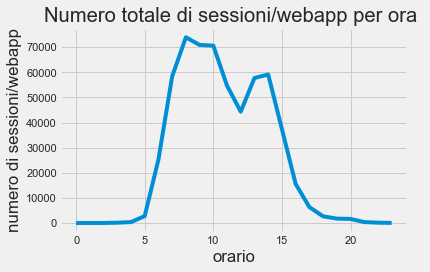

In [6]:
plt.style.use('fivethirtyeight')

hours_x = webapp_series_by_h.index
webapp_count_y = webapp_series_by_h.values
plt.plot(hours_x, webapp_count_y)

plt.title('Numero totale di sessioni/webapp per ora ')
plt.xlabel('orario')
plt.ylabel('numero di sessioni/webapp')
plt.grid(True)
plt.tight_layout()
plt.show()

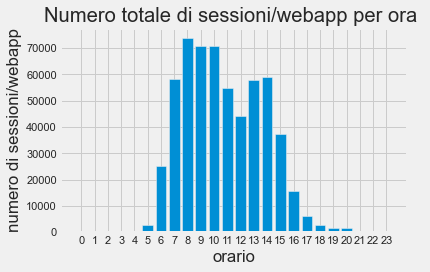

In [7]:
plt.bar(hours_x, webapp_count_y)

plt.xticks(ticks=hours_x, labels=hours_x)
plt.title('Numero totale di sessioni/webapp per ora ')
plt.xlabel('orario')
plt.ylabel('numero di sessioni/webapp')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
webapp_dett.index = webapp_dett.index.floor('h')

In [9]:
webapp_dett

DATA
2020-07-01 03:00:00      /cgapps3/wfciclopassivo
2020-07-01 06:00:00         /cgapps3/ContiAttesa
2020-07-01 09:00:00         /cgapps3/ContiAttesa
2020-07-01 10:00:00         /cgapps3/ContiAttesa
2020-07-01 10:00:00         /cgapps3/ContiAttesa
                                 ...            
2021-02-07 20:00:00         /cgapps3/moduliAdobe
2021-02-07 20:00:00         /cgapps3/moduliAdobe
2021-02-07 20:00:00         /cgapps3/moduliAdobe
2021-02-07 21:00:00    /cgapps3/transfer-account
2021-02-07 23:00:00           /cgvad/welcome-kit
Name: WEBAPP, Length: 584734, dtype: object

In [10]:
webapp_dett_hh = webapp_dett.groupby(by=[webapp_dett.index, webapp_dett]).count()

In [11]:
webapp_dett_hh['2020-12-15 10'].sort_values(ascending=False).head()

WEBAPP
/cgapps3/pa24                951
/cgapps2/c-tracking           53
/cgapps3/transfer-account     45
/cgapps4/issuing              34
/cgapps2/c-tracking3          33
Name: WEBAPP, dtype: int64

In [12]:
webapp_dett_hh

DATA                 WEBAPP                   
2020-07-01 03:00:00  /cgapps3/wfciclopassivo       1
2020-07-01 05:00:00  /cgapps2/DOCPA                1
                     /cgapps2/archCflow            1
                     /cgapps2/c-tracking           1
                     /cgapps3/fattureb2b           2
                                                  ..
2021-02-07 19:00:00  /cgapps3/moduliAdobe         12
2021-02-07 20:00:00  /cgapps3/moduliAdobe         11
2021-02-07 21:00:00  /cgapps2/c-tracking3          1
                     /cgapps3/transfer-account     1
2021-02-07 23:00:00  /cgvad/welcome-kit            1
Name: WEBAPP, Length: 52972, dtype: int64

In [13]:
webapp_dett_hh.index

MultiIndex([('2020-07-01 03:00:00',   '/cgapps3/wfciclopassivo'),
            ('2020-07-01 05:00:00',            '/cgapps2/DOCPA'),
            ('2020-07-01 05:00:00',        '/cgapps2/archCflow'),
            ('2020-07-01 05:00:00',       '/cgapps2/c-tracking'),
            ('2020-07-01 05:00:00',       '/cgapps3/fattureb2b'),
            ('2020-07-01 05:00:00', '/cgapps3/transfer-account'),
            ('2020-07-01 05:00:00',   '/cgapps3/wfciclopassivo'),
            ('2020-07-01 05:00:00',        '/cgapps4/mutui-csr'),
            ('2020-07-01 05:00:00',        '/cgvad/welcome-kit'),
            ('2020-07-01 06:00:00',          '/GepoServlet/CFS'),
            ...
            ('2021-02-07 17:00:00',      '/cgapps3/moduliAdobe'),
            ('2021-02-07 18:00:00',      '/cgapps2/c-tracking3'),
            ('2021-02-07 18:00:00',      '/cgapps3/moduliAdobe'),
            ('2021-02-07 19:00:00',      '/cgapps2/c-tracking3'),
            ('2021-02-07 19:00:00',       '/cgapps3/fattureb

E' necessario convertire la multi-index Series ottenuta in un DataFrame in cui il secondo indice sia utilizzato come nome di colonna.<br>
A tal fine si può utilizzare il metodo unstack()

In [14]:
dati_webapp = webapp_dett_hh.unstack(level=1)
dati_webapp

WEBAPP,/GepoServlet/CFS,/GepoServlet/DAU,/GepoServlet/GEPO,/GepoServlet/JasperReport,/agapps5/protocolCedint,/cgapps2/BofficeUtenzeLivInt,/cgapps2/DOCPA,/cgapps2/GesTab,/cgapps2/POS,/cgapps2/accelera,...,/cgvad/welcome-kit,/gam-admin/activities,/gam-admin/areas,/gam-admin/companies,/gam-admin/domains,/gam-admin/groups,/gam-admin/resetUserPwd,/gam-admin/services,/gam-admin/upload,/gam-admin/users
DATA,,,,,,,,,,,,,,,,,,,,,
2020-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 06:00:00,6.0,10.0,NaN,7.0,NaN,NaN,4.0,NaN,9.0,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 07:00:00,1.0,18.0,NaN,4.0,NaN,NaN,2.0,1.0,11.0,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 08:00:00,NaN,13.0,NaN,2.0,NaN,NaN,8.0,NaN,14.0,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dati_webapp.describe()

WEBAPP,/GepoServlet/CFS,/GepoServlet/DAU,/GepoServlet/GEPO,/GepoServlet/JasperReport,/agapps5/protocolCedint,/cgapps2/BofficeUtenzeLivInt,/cgapps2/DOCPA,/cgapps2/GesTab,/cgapps2/POS,/cgapps2/accelera,...,/cgvad/welcome-kit,/gam-admin/activities,/gam-admin/areas,/gam-admin/companies,/gam-admin/domains,/gam-admin/groups,/gam-admin/resetUserPwd,/gam-admin/services,/gam-admin/upload,/gam-admin/users
count,1776.000000,301.000000,40.000000,1238.000000,1.0,656.000000,1632.000000,904.000000,1515.000000,128.000000,...,2391.000000,69.000000,7.000000,5.0,4.0,26.000000,32.000000,8.000000,11.0,314.000000
mean,3.245495,2.176080,3.275000,3.700323,1.0,1.841463,5.083946,1.434735,5.882508,2.250000,...,7.370138,1.434783,1.142857,1.0,1.0,1.230769,1.062500,1.125000,1.0,1.299363
std,2.754864,3.436892,2.385721,4.158328,NaN,1.388894,3.740797,0.783375,6.096380,1.948147,...,5.874896,1.063820,0.377964,0.0,0.0,0.651625,0.245935,0.353553,0.0,0.649059
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.0,1.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
50%,2.000000,1.000000,3.000000,3.000000,1.0,1.000000,4.000000,1.000000,4.000000,2.000000,...,6.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
75%,4.000000,2.000000,4.000000,5.000000,1.0,2.000000,7.000000,2.000000,8.000000,3.000000,...,11.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.000000
max,27.000000,36.000000,12.000000,81.000000,1.0,15.000000,29.000000,8.000000,73.000000,13.000000,...,55.000000,7.000000,2.000000,1.0,1.0,4.000000,2.000000,2.000000,1.0,7.000000


In [16]:
dati_webapp['/cgapps2/DOCPA'].sum()

8297.0

In [17]:
dati_webapp.transpose()

DATA,2020-07-01 03:00:00,2020-07-01 05:00:00,2020-07-01 06:00:00,2020-07-01 07:00:00,2020-07-01 08:00:00,2020-07-01 09:00:00,2020-07-01 10:00:00,2020-07-01 11:00:00,2020-07-01 12:00:00,2020-07-01 13:00:00,...,2021-02-07 13:00:00,2021-02-07 14:00:00,2021-02-07 15:00:00,2021-02-07 16:00:00,2021-02-07 17:00:00,2021-02-07 18:00:00,2021-02-07 19:00:00,2021-02-07 20:00:00,2021-02-07 21:00:00,2021-02-07 23:00:00
WEBAPP,,,,,,,,,,,,,,,,,,,,,
/GepoServlet/CFS,NaN,NaN,6.0,1.0,NaN,NaN,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/GepoServlet/DAU,NaN,NaN,10.0,18.0,13.0,8.0,12.0,4.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/GepoServlet/GEPO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/GepoServlet/JasperReport,NaN,NaN,7.0,4.0,2.0,NaN,3.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/agapps5/protocolCedint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/gam-admin/groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/gam-admin/resetUserPwd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/gam-admin/services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dati_webapp.sum(axis=1)

DATA
2020-07-01 03:00:00      1.0
2020-07-01 05:00:00     11.0
2020-07-01 06:00:00    165.0
2020-07-01 07:00:00    245.0
2020-07-01 08:00:00    252.0
                       ...  
2021-02-07 18:00:00     12.0
2021-02-07 19:00:00     14.0
2021-02-07 20:00:00     11.0
2021-02-07 21:00:00      2.0
2021-02-07 23:00:00      1.0
Length: 3715, dtype: float64

In [19]:
dati_webapp.sum(axis=0) #Default

WEBAPP
/GepoServlet/CFS             5764.0
/GepoServlet/DAU              655.0
/GepoServlet/GEPO             131.0
/GepoServlet/JasperReport    4581.0
/agapps5/protocolCedint         1.0
                              ...  
/gam-admin/groups              32.0
/gam-admin/resetUserPwd        34.0
/gam-admin/services             9.0
/gam-admin/upload              11.0
/gam-admin/users              408.0
Length: 79, dtype: float64

In [20]:
dati_webapp_n = dati_webapp.loc[:, (dati_webapp.sum() > 10000)]
dati_webapp_n

WEBAPP,/cgapps2/c-tracking,/cgapps2/c-tracking2,/cgapps2/c-tracking3,/cgapps2/geco,/cgapps2/ptf,/cgapps3/fattureb2b,/cgapps3/moduliAdobe,/cgapps3/pa24,/cgapps3/transfer-account,/cgapps3/wfciclopassivo,/cgvad/welcome-kit
DATA,,,,,,,,,,,
2020-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-07-01 05:00:00,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,3.0
2020-07-01 06:00:00,18.0,2.0,NaN,26.0,3.0,12.0,NaN,24.0,16.0,6.0,7.0
2020-07-01 07:00:00,41.0,4.0,NaN,37.0,2.0,16.0,NaN,46.0,29.0,8.0,9.0
2020-07-01 08:00:00,43.0,8.0,NaN,36.0,1.0,19.0,1.0,51.0,24.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-07 18:00:00,NaN,NaN,1.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
2021-02-07 19:00:00,NaN,NaN,1.0,NaN,NaN,1.0,12.0,NaN,NaN,NaN,NaN
2021-02-07 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
